## KNN regressor:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
28037,0.34,Very Good,E,VS2,59.8,62.0,659,4.52,4.54,2.71
46817,0.60,Premium,D,VS2,60.9,61.0,1808,5.43,5.40,3.30
43784,0.57,Ideal,G,SI1,62.2,55.0,1441,5.33,5.35,3.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
X = df.drop(['price'],axis=1)
y = df['price']

In [6]:
X = pd.get_dummies(X, dtype=np.int32)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
X_train.sample(4)

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
29447,0.34,61.2,56.0,4.51,4.54,2.77,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28007,0.30,62.6,56.0,4.29,4.34,2.70,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2399,0.31,61.7,55.0,4.37,4.39,2.70,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24160,2.01,62.0,56.0,8.01,7.87,4.92,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [20]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1', 'clarity_VS2',
       'clarity_SI1', 'clarity_SI2', 'clarity_I1'],
      dtype='object')

In [21]:
ct = ColumnTransformer(
    transformers=[
        ('t1', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])
    ],
    remainder='passthrough'
)

In [22]:
new_X_train = ct.fit_transform(X_train)
new_X_test = ct.transform(X_test)

In [23]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(new_X_train, y_train)

KNeighborsRegressor(weights='distance')

In [24]:
y_pred = knn.predict(new_X_test)

In [14]:
y_test.mean()

np.float64(3932.6366332962552)

In [15]:
r2_score(y_test, y_pred)

0.9633448406220553

In [16]:
mean_absolute_error(y_test, y_pred)

384.19125572396115

In [17]:
score = []

for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(new_X_train, y_train)
    y_pred = knn.predict(new_X_test)
    score.append(r2_score(y_test, y_pred))

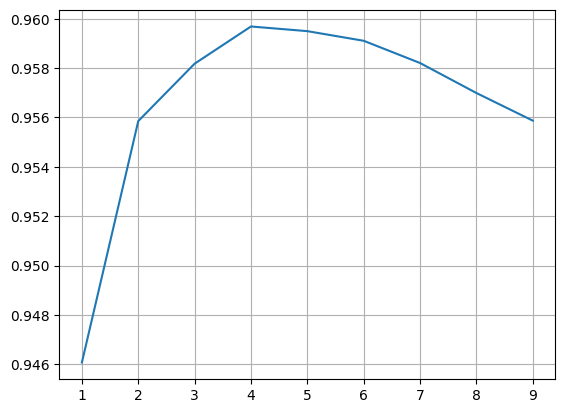

In [18]:
plt.plot(range(1,10), score)
plt.grid()

---

## Hyperparameters:

KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

### 1. KNeighborsRegressor

`class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

- Regression based on k-nearest neighbors.

### 2. KNeighborsClassifier

`class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

- Classifier implementing the k-nearest neighbors vote.

## Parameters of both KNN

1. `n_neighbors` (default = 5)

- Number of nearest neighbors used for prediction.
- Higher values smooth predictions but may reduce precision.

2. `weights` (default = ‘uniform’)

- Defines how neighbors contribute to prediction.

- Options:
    - uniform → Equal weight for all neighbors.
    - distance → Closer neighbors get more influence.
    - Callable → Custom weight function.

In [25]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(new_X_train, y_train)
y_pred = knn.predict(new_X_test)
r2_score(y_test, y_pred)

0.9633448406220553

In [28]:
knn = KNeighborsRegressor(n_neighbors=1, weights='uniform')
knn.fit(new_X_train, y_train)
y_pred = knn.predict(new_X_test)
r2_score(y_test, y_pred)

0.9460735192555447

3. `algorithm` (default = ‘auto’)

- Method used to find nearest neighbors.
- Options:
    - ‘auto’ → Selects the best algorithm automatically.
    - ‘ball_tree’ → Uses BallTree for fast searches.
    - ‘kd_tree’ → Uses KDTree (good for low-dimensional data).
    - ‘brute’ → Uses brute-force search.


4. `leaf_size` (default = 30)

- Size of leaves in BallTree or KDTree.
- Affects speed and memory usage.

In [30]:
knn = KNeighborsRegressor(n_neighbors=6, weights='distance', algorithm='ball_tree', leaf_size=50)
knn.fit(new_X_train, y_train)
y_pred = knn.predict(new_X_test)
r2_score(y_test, y_pred)

0.9635084959624409

5. `p` (default = 2)

- Defines the distance metric based on Minkowski distance.
- Options:
    - p = 1 → Manhattan distance (L1 norm).
    - p = 2 → Euclidean distance (L2 norm).
    - p > 2 → General Minkowski distance.

6. `metric` (default = ‘minkowski’)

- Distance function for computing neighbors.
- Options:
    - ‘minkowski’ (general case).
    - ‘manhattan’ (p=1).
    - ‘euclidean’ (p=2).
    - Custom callable function → User-defined metric.

7. `metric_params` (default = None)

- Extra parameters for the selected metric function.

In [33]:
knn = KNeighborsRegressor(n_neighbors=3, weights='distance', p=1, metric='euclidean')
knn.fit(new_X_train, y_train)
y_pred = knn.predict(new_X_test)
r2_score(y_test, y_pred)

0.9605415406198262

-> Priority Rule:
- metric takes priority over p
- If metric is explicitly specified (like 'euclidean' in this case), then p is ignored.

8. `n_jobs` (default = None)

- Number of CPU cores for parallel processing.
- None → Single core.
- -1 → Use all available processors.

In [37]:
knn = KNeighborsRegressor(n_neighbors=3, weights='distance', p=2, n_jobs=-1)
knn.fit(new_X_train, y_train)
y_pred = knn.predict(new_X_test)
r2_score(y_test, y_pred)

0.9605415406198262

It becomes little bit faster..